# matplotlib cheat sheet

>https://matplotlib.org/cheatsheets/


In [1]:
%matplotlib inline

# 输出 svg，更清晰
%config InlineBackend.figure_format = 'svg'

from decimal import Decimal

import matplotlib.pyplot as plt
import numpy as np


PI2 = 2 * np.pi

### 1. 坐标轴经过原点

In [2]:
def set_ticks_pass_zero(axes):
    # 隐藏掉右边和上边的坐标轴
    # 这里 spine 是脊柱的意思，代指坐标轴（Spines，一条线段上有一系列的凸起，是不是很像脊柱骨啊~）
    axes.spines['right'].set_color('none')
    axes.spines['top'].set_color('none')
    
    # 将 bottom/left 的 spines 设为 x/y 坐标轴
    axes.xaxis.set_ticks_position('bottom')
    axes.yaxis.set_ticks_position('left')
    
    # 使 spines 都经过原点
    axes.spines['bottom'].set_position('zero')  # 即 y 的 data 为 0 的位置
    axes.spines['left'].set_position('zero')

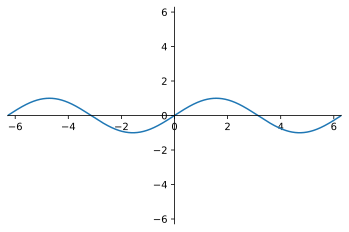

In [3]:
fig, ax = plt.subplots(dpi=120)

set_ticks_pass_zero(ax)

ax.set_xlim(-PI2, PI2)
ax.set_ylim(-PI2, PI2)

# set_axis_pi(ax, Decimal('2'), Decimal('0.5'))

x = np.arange(-PI2, PI2, 0.01)
y = np.sin(x)
ax.plot(x,y)

### 2. 坐标用 pi 标注

In [5]:
def _range_decimal(start: Decimal, stop: Decimal, step: Decimal):
    if start >= stop:
        raise RuntimeError("start >= stop can't be true!")

    res = []
    num = start
    while num < stop:
        res.append(num)
        num += step
    
    return res[1:]  # 返回一个全开区间，即不包括 start 和 stop 的区间


def _get_label(n: Decimal):
    a, b = n.as_integer_ratio()
    
    if b == 1:  # 分母为 1，即为整数
        if n == Decimal('0'):
            return '0'
        elif abs(n) == Decimal('1'):  # n 为 1
            return r'$\pi$' if n >= 0 else r'$-\pi$'
        else:
            return rf'${a} \pi$'
    else: # 为分数
        return r'$\frac{'+ str(a) + '}{' + str(b) + '} \pi$'

    
def set_axis_pi(axes, n: Decimal, step: Decimal):
    """
    x/y 坐标轴的 limit 为 -n*pi 到 n*pi
    tick 的间隔为 step*pi
    """
    n_pi = float(n) * np.pi
    
    # 设置坐标轴的 limit
    axes.set_xlim(-n_pi, n_pi)
    axes.set_ylim(-n_pi, n_pi)
    
    # 设置 ticks
    ticks_without_pi = _range_decimal(-n, Decimal('0'), step) + _range_decimal(Decimal('0'), n , step)  # 这个是 pi 的系数 range
    ticks = [float(it)*np.pi for it in ticks_without_pi]  # 乘上pi
    
    labels = list(map(_get_label, ticks_without_pi))  # 标签
    
    # 设置 x/y 轴的坐标
    axes.set_xticks(ticks)
    axes.set_xticklabels(labels)
    axes.set_yticks(ticks)
    axes.set_yticklabels(labels)
